# UK Train Rides Analysis

# Data Cleaning

In [4]:
import pandas as pd
import numpy as np

# Load the Dataset 

In [7]:
df = pd.read_csv("C:/Users/shams/Desktop/DEPI project/UK Train Rides/railway.csv")

# Basic Exploration

In [10]:
print(df.shape) 

(31653, 18)


In [12]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [19]:
print(df.head())  

            Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card      NaN     Standard     Advance      3   
3    Credit Card      NaN     Standard     Advance     13   
4    Contactless      NaN     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street      2024-01-01   
1     London Kings Cross      

# Check Missing & Duplicates

In [17]:
print(df.isna().sum()) 

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64


In [22]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


# Trim Whitespaces & Normalize Text

In [25]:
obj_cols = df.select_dtypes(include='object').columns

In [27]:
for col in obj_cols:
    df[col] = df[col].astype(str).str.strip() 

# Replace Placeholders with NaN

In [30]:
df.replace(['', 'NA', 'N/A', 'na', 'None', 'NULL', 'null'], np.nan, inplace=True)

In [32]:
print(df.isna().sum()) 

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64


# Combine Date + Time Columns

In [35]:
df['purchase_datetime'] = pd.to_datetime(
    df['Date of Purchase'] + ' ' + df['Time of Purchase'],
    dayfirst=True,
    errors='coerce'
)

# Create Derived Time Columns

In [38]:
df['purchase_date'] = df['purchase_datetime'].dt.date
df['purchase_hour'] = df['purchase_datetime'].dt.hour
df['day_of_week'] = df['purchase_datetime'].dt.day_name()
df['month'] = df['purchase_datetime'].dt.month
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']) 

#  Convert Numeric-like Columns

In [41]:
for col in df.columns:
    if df[col].dtype == 'object':
        # 1️⃣ نحول القيم لنصوص ونحذف الفواصل لو موجودة
        df[col] = df[col].astype(str).str.replace(',', '', regex=False)

        # 2️⃣ نحاول نحول العمود لأرقام، لكن بطريقة آمنة بدون errors='ignore'
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            # لو العمود فيه قيم مش رقمية، بنتجاهله ونكمل
            pass

In [43]:
df.dtypes.value_counts()

object            19
float64            2
int64              1
datetime64[ns]     1
bool               1
Name: count, dtype: int64

In [45]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  object        
 2   Time of Purchase     31653 non-null  object        
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  object        
 12  Departure Time       31653 non-null  object        
 13  Arrival Time         31653 non-

# Remove Duplicates

In [48]:
df.drop_duplicates(inplace=True)

# Check Missing Values Again

In [51]:
print(df.isna().sum())

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard                   0
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time        0
Journey Status             0
Reason for Delay           0
Refund Request             0
purchase_datetime      17866
purchase_date              0
purchase_hour          17866
day_of_week                0
month                  17866
is_weekend                 0
dtype: int64


In [53]:
invalid_dates = df[
    pd.to_datetime(df['Date of Purchase'] + ' ' + df['Time of Purchase'], 
                   dayfirst=True, errors='coerce').isna()
][['Date of Purchase', 'Time of Purchase']]

print("عدد الصفوف اللي فيها مشكلة:", len(invalid_dates))
display(invalid_dates.head(10))

عدد الصفوف اللي فيها مشكلة: 17866


,Date of Purchase,Time of Purchase
1,2023-12-16,11:23:01
2,2023-12-19,19:51:27
3,2023-12-20,23:00:36
4,2023-12-27,18:22:56
5,2023-12-30,07:56:06
6,2023-12-31,00:02:01
7,2023-12-31,01:35:18
8,2023-12-31,01:43:09
9,2023-12-31,03:05:52
10,2023-12-31,03:26:37


In [55]:
df['Date of Purchase'] = df['Date of Purchase'].astype(str).str.strip()
df['Time of Purchase'] = df['Time of Purchase'].astype(str).str.strip()

In [57]:
print(df['Date of Purchase'].head())
print(df['Time of Purchase'].head())

0    2023-12-08
1    2023-12-16
2    2023-12-19
3    2023-12-20
4    2023-12-27
Name: Date of Purchase, dtype: object
0    12:41:11
1    11:23:01
2    19:51:27
3    23:00:36
4    18:22:56
Name: Time of Purchase, dtype: object


In [59]:
df['purchase_datetime'] = pd.to_datetime(
    df['Date of Purchase'] + ' ' + df['Time of Purchase'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)

In [61]:
df['purchase_date'] = df['purchase_datetime'].dt.date
df['purchase_hour'] = df['purchase_datetime'].dt.hour
df['day_of_week'] = df['purchase_datetime'].dt.day_name()
df['month'] = df['purchase_datetime'].dt.month
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

In [63]:
print(df[['purchase_datetime', 'purchase_hour', 'month']].isna().sum())

purchase_datetime    0
purchase_hour        0
month                0
dtype: int64


In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  object        
 2   Time of Purchase     31653 non-null  object        
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  object        
 12  Departure Time       31653 non-null  object        
 13  Arrival Time         31653 non-

In [67]:
print(df.describe(include='all'))

                 Transaction ID Date of Purchase Time of Purchase  \
count                     31653            31653            31653   
unique                    31653              128            24351   
top     da8a6ba8-b3dc-4677-b176       2024-02-02         08:16:53   
freq                          1              513                6   
mean                        NaN              NaN              NaN   
min                         NaN              NaN              NaN   
25%                         NaN              NaN              NaN   
50%                         NaN              NaN              NaN   
75%                         NaN              NaN              NaN   
max                         NaN              NaN              NaN   
std                         NaN              NaN              NaN   

       Purchase Type Payment Method Railcard Ticket Class Ticket Type  \
count          31653          31653    31653        31653       31653   
unique             2     

# Data Processing

# Feature Engineering

In [71]:
# مده الرحله بالدقايق يا بني ادمين 
df['scheduled_arrival'] = pd.to_datetime(df['Date of Journey'] + ' ' + df['Arrival Time'], errors='coerce')
df['departure_datetime'] = pd.to_datetime(df['Date of Journey'] + ' ' + df['Departure Time'], errors='coerce')
df['journey_duration_mins'] = (df['scheduled_arrival'] - df['departure_datetime']).dt.total_seconds() / 60

In [73]:
# مده التاخير بالدقايق يا بشر 
df['actual_arrival_datetime'] = pd.to_datetime(df['Date of Journey'] + ' ' + df['Actual Arrival Time'], errors='coerce')
df['delay_minutes'] = (df['actual_arrival_datetime'] - df['scheduled_arrival']).dt.total_seconds() / 60
# شرط لو التاخير بالسالب يعني القطر دا وصل بدري ونخله صفر 
df['delay_minutes'] = df['delay_minutes'].apply(lambda x: max(x, 0) if pd.notnull(x) else x)

In [75]:
# بنطلع اليوم والشهر وهل اليوم دا ويك اند ولا لا ؟؟  
df['journey_date'] = pd.to_datetime(df['Date of Journey'], errors='coerce')
df['day_of_week'] = df['journey_date'].dt.day_name()
df['month'] = df['journey_date'].dt.month_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Encoding

In [78]:
# بنحول النصوص دي لي رقميه عشان يسهل التحليل 
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Purchase Type', 'Payment Method', 'Railcard', 
                    'Ticket Class', 'Ticket Type', 'Journey Status']

encoder = LabelEncoder()
for col in categorical_cols:
    df[col + '_encoded'] = encoder.fit_transform(df[col]) 

In [80]:
# Missing Values 
df['delay_minutes'] = df['delay_minutes'].fillna(df['delay_minutes'].median())
df['journey_duration_mins'] = df['journey_duration_mins'].fillna(df['journey_duration_mins'].median())

<Axes: xlabel='delay_minutes', ylabel='Count'>

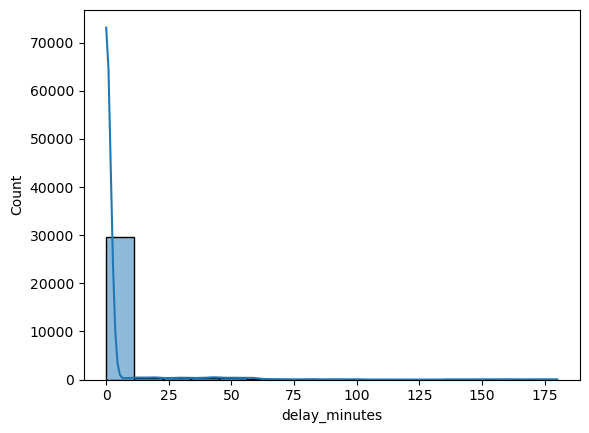

In [82]:
import seaborn as sns
sns.histplot(df['delay_minutes'], kde=True)

# Outliers

In [85]:
# لأن الأسعار الغريبة (0 أو 5000 مثلاً) ممكن تشوّه التحليل
# تحديد الحدود العليا والدنيا بناءً على IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# استبعاد القيم الشاذة الكبيرة جدًا أو الصغيرة جدًا
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
#عشان نخلي القيم في نفس النطاق (0 → 1) لتسهيل التحليل  
scaler = MinMaxScaler()
df[['Price', 'journey_duration_mins', 'delay_minutes']] = scaler.fit_transform(
    df[['Price', 'journey_duration_mins', 'delay_minutes']]
)

In [92]:
date_columns = [
    'Date of Purchase', 'Date of Journey', 
    'purchase_datetime', 'departure_datetime', 
    'actual_arrival_datetime'
]

In [94]:
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')

print("🕒 Fixed datetime columns ✅")

🕒 Fixed datetime columns ✅


In [102]:

# قائمة الأعمدة والقيم الجديدة
fill_values = {
    'Railcard': 'Unknown',
    'Reason for Delay': 'Not Applicable'
}

print("جاري معالجة القيم المفقودة...")

# تنفيذ التعبئة لكل عمود
for col, fill_val in fill_values.items():
    if col in df.columns:
        # استخدام fillna لتعبئة القيم المفقودة
        df[col] = df[col].fillna(fill_val)
        print(f"✅ تم تعبئة القيم المفقودة في عمود '{col}' بالقيمة: '{fill_val}'")
    else:
        print(f"⚠️ تحذير: العمود '{col}' غير موجود في DataFrame.")

# التحقق من عدم وجود قيم مفقودة في هذه الأعمدة بعد التعبئة
print("\nالتحقق النهائي من القيم المفقودة في الأعمدة:")
print(df[['Railcard', 'Reason for Delay']].isna().sum())

جاري معالجة القيم المفقودة...
✅ تم تعبئة القيم المفقودة في عمود 'Railcard' بالقيمة: 'Unknown'
✅ تم تعبئة القيم المفقودة في عمود 'Reason for Delay' بالقيمة: 'Not Applicable'

التحقق النهائي من القيم المفقودة في الأعمدة:
Railcard            0
Reason for Delay    0
dtype: int64


In [104]:
num_cols = ['delay_minutes', 'journey_duration_mins', 'Price']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

print("🔧 Missing values handled ✅")

🔧 Missing values handled ✅


In [106]:
df = df[df['journey_duration_mins'] > 0]

# 2. تصحيح القيم السالبة في delay_minutes (لو فيه)
df['delay_minutes'] = df['delay_minutes'].abs()

# 3. حذف الأسعار السالبة أو الصفرية
df = df[df['Price'] > 0]

print("⏱ Non-logical values fixed ✅")


⏱ Non-logical values fixed ✅


In [108]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df = df[(df['Price'] >= lower) & (df['Price'] <= upper)]

print("📊 Outliers handled ✅")

📊 Outliers handled ✅


In [110]:
print("\n=== FINAL SUMMARY ===")
print("Rows:", len(df))
print("Columns:", len(df.columns))
print("Missing values:", df.isna().sum().sum())


=== FINAL SUMMARY ===
Rows: 27966
Columns: 36
Missing values: 57590


In [114]:
df.to_csv("file-cleaned.csv", index=False)
print(" file-cleaned.csv DownLoad Succesfully ")

 file-cleaned.csv DownLoad Succesfully 


In [116]:
df = pd.read_csv("file-cleaned.csv")

In [118]:
df_clean = pd.read_csv("file-cleaned.csv")

# 2. تحميل الملف الأصلي (لأخذ قيم Min و Max منه)
# سنقوم بتنظيفه أولاً من القيم الشاذة، كما فعلتِ في دفتر الملاحظات الأصلي
df_original = pd.read_csv('C:/Users/shams/Desktop/DEPI project/UK Train Rides/railway.csv')

# عرض أول خمسة صفوف من السعر المقيس
print("أول 5 صفوف من السعر المقيس:")
print(df_clean['Price'].head()) 

أول 5 صفوف من السعر المقيس:
0    0.531646
1    0.278481
2    0.025316
3    0.151899
4    0.430380
Name: Price, dtype: float64


In [120]:
# 1. إزالة أي صف لا يحتوي على قيمة سعر (NaN)
df_original.dropna(subset=['Price'], inplace=True)

# 2. حساب الحدود لإزالة القيم الشاذة (Outliers) كما فعلتِ
Q1 = df_original['Price'].quantile(0.25)
Q3 = df_original['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. تصفية البيانات الأصلية للحصول على الحدين الأدنى والأقصى المستخدمين للتقييس
df_filtered = df_original[(df_original['Price'] >= lower_bound) & (df_original['Price'] <= upper_bound)]

# 4. تحديد القيم التي استخدمها المقيس (Scaler)
X_min = df_filtered['Price'].min()
X_max = df_filtered['Price'].max()

print(f"\nالقيمة الدنيا (Min) المستخدمة في التقييس: {X_min:.2f}")
print(f"القيمة القصوى (Max) المستخدمة في التقييس: {X_max:.2f}")


القيمة الدنيا (Min) المستخدمة في التقييس: 1.00
القيمة القصوى (Max) المستخدمة في التقييس: 80.00


In [122]:
# تنفيذ التقييس العكسي
# X_scaled: عمود السعر في الملف النظيف (df_clean['Price'])
# X_max و X_min: القيم التي حسبناها للتو

df_clean['Price_Original'] = (
    df_clean['Price'] * (X_max - X_min)
) + X_min

# 4. التحقق من النتيجة
print("\nأول 5 صفوف من السعر الأصلي (بعد التقييس العكسي):")
print(df_clean[['Price', 'Price_Original']].head())


أول 5 صفوف من السعر الأصلي (بعد التقييس العكسي):
      Price  Price_Original
0  0.531646            43.0
1  0.278481            23.0
2  0.025316             3.0
3  0.151899            13.0
4  0.430380            35.0


In [ ]:
import pandas as pd

# 1. تحميل الملفات الضرورية
# df_clean: الملف النظيف الذي سيتم تعديله
df_clean = pd.read_csv('Cleanedfile.csv')
# df_original: الملف الأصلي (railway.csv) اللازم لحساب حدود التقييس
df_original = pd.read_csv("C:/Users/shams/Desktop/DEPI project/UK Train Rides/railway.csv")

# 2. إعادة حساب قيم Min و Max التي استخدمت للتقييس
# (يجب تكرار خطوات تنظيف القيم الشاذة لتحديد المدى الدقيق)
df_original.dropna(subset=['Price'], inplace=True)

Q1 = df_original['Price'].quantile(0.25)
Q3 = df_original['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

